## Load dataset

In [1]:
import pandas as pd
import re
from PString import PString

In [2]:
df = pd.read_csv('data/pronunciation_sp.csv')
df.head()

,word,category,pronunciation
0,a,artigo,a
1,a,preposição,a
2,á-bê-cê,nome masculino,ˌa.bˌe.sˈe
3,a-pro·pó·si·to,nome masculino,a.pɾo.pˈɔ.zi.tʊ
4,à-von·ta·de,nome masculino,ˌa.võ.tˈa.dʒi


In [3]:
df.dropna(inplace=True, subset=['word', 'pronunciation'])
df.drop_duplicates(inplace=True, subset=['word'])
df.shape

(53397, 3)

In [4]:
df['pronunciation'] = df['pronunciation'].apply(lambda v: v.split('$')[0].strip() if '$' in v else v.strip())

## Clean dataset

When manipulating the dataset, some inconsistencies were detected. These are addressed below.

In [5]:
# double pronunciations ("ou" == "or" in English)
idx = df.loc[df['pronunciation'].str.contains(' ou')].index
print(df.loc[idx].shape)
df.loc[idx].head()

(686, 3)


,word,category,pronunciation
204,a·be·ta,nome feminino,a.bˈe.tə ou a.bˈɛ.tə
209,a·bi·be,nome masculino,a.bˈi.bi ou a.bˈi.bi
401,ab·sen·tis·ta,nome masculino,a.bi.sẽ.tʃˈis.tə ou a.bi.sẽ.tʃˈis.tə
447,abs·tra·ção,nome feminino,abs.tɾa.sˈə̃w ou abs.tɾa.sˈə̃w
457,abs·tra·to,adjetivo,abs.tɾˈa.tʊ ou abs.tɾˈa.tʊ


In [6]:
# keep only first pronunciation
df.loc[idx, 'pronunciation'] = df.loc[idx, 'pronunciation'].apply(lambda v: v.split('ou')[0].strip())

In [7]:
# some words don't have a valid transcription
# instead their pronunciation appears as "ou"
# which is incorrect
idx = df.loc[df['pronunciation'].str.contains('ou')].index.tolist()
print(df.loc[idx].shape)
df.loc[idx].head()

(26, 3)


,word,category,pronunciation
7310,ba·by-sit·ter,nome masculino,ou
12390,chauf·feur,nome masculino,ou
15835,cor·don-bleu,nome masculino,ou
19794,de·sig·ner,nome masculino,ou
28998,free·lan·ce,nome masculino,ou


In [8]:
# remove these invalid words
df = df.loc[~df.index.isin(idx)]

In [9]:
# fix pronunciations
idx = df.query('word == "des·co·la·gem"').index
print(df.loc[idx]) # wrong suffix
df.at[idx[0], 'pronunciation'] = 'dʒis.ko.lˈa.ʒẽj' 

print()
idx = df.query('word == "mi·cro·fa·rad"').index
print(df.loc[idx]) # missing suffix
df.at[idx[0], 'pronunciation'] = 'mi.kɾo.fˈa.ɾad'

print()
idx = df.query('word == "mi·cro·volt"').index
print(df.loc[idx]) # missing suffix
df.at[idx[0], 'pronunciation'] = 'mi.kɾo.vˈoʊtʃ'

print()
idx = df.query('word == "pa·no-cru"').index
print(df.loc[idx]) # wrong phoneme (/c/ instead of /k/)
df.at[idx[0], 'pronunciation'] = 'pˌə.nʊ.krˈu'

# these two words have pronunciations that correspond to completely different words
idx_1 = df.query('word == "cor·ta-u·nhas"').index.tolist()
idx_2 = df.query('word == "tra·ção"').index.tolist()
idx = idx_1 + idx_2
print()
print(df.loc[idx])

# remove these invalid words
df = df.loc[~df.index.isin(idx)]

                word       category          pronunciation
18754  des·co·la·gem  nome feminino  dʒis.ko.lˈa.ʒẽjʌ̃j_m

                word        category pronunciation
39932  mi·cro·fa·rad  nome masculino       mi.kɾo.

              word        category pronunciation
40017  mi·cro·volt  nome masculino       mi.kɾo.

            word        category pronunciation
44141  pa·no-cru  nome masculino   pˌə.nʊ.crˈu

                word        category   pronunciation
16085  cor·ta-u·nhas  nome masculino  kˌɔɾ.tə.fˈo.gʊ
59627        tra·ção  nome masculino       se.lˈɛ.tʊ


## Preprocess dataset

In [10]:
df['pronunciation_clean'] = df['pronunciation'].apply(lambda v: PString(re.sub('[ ˌ.ˈ_\-]', '', v)))
df['word_clean'] = df['word'].apply(lambda v: re.sub('[ˌ·ˈ\'_]', '', v).replace(' ', '-').lower())
df.head()

,word,category,pronunciation,pronunciation_clean,word_clean
0,a,artigo,a,a,a
2,á-bê-cê,nome masculino,ˌa.bˌe.sˈe,abese,á-bê-cê
3,a-pro·pó·si·to,nome masculino,a.pɾo.pˈɔ.zi.tʊ,apɾopɔzitʊ,a-propósito
4,à-von·ta·de,nome masculino,ˌa.võ.tˈa.dʒi,avõtadʒi,à-vontade
5,a·a,nome feminino,a.ˈa,aa,aa


In [11]:
def get_chars_list(series):
    return series.apply(list).apply(pd.Series).stack().unique()

In [12]:
tokens = get_chars_list(df['pronunciation_clean'])
print(f'Tokens: {tokens}')
print(f'Number of tokens: {len(tokens)}')

chars = get_chars_list(df['word_clean'])
print(f'Chars: {chars}')
print(f'Number of chars: {len(chars)}')

Tokens: ['a' 'b' 'e' 's' 'p' 'ɾ' 'o' 'ɔ' 'z' 'i' 't' 'ʊ' 'v' 'õ' 'dʒ' 'w' 'x'
 'tʃ' 'g' 'd' 'j' 'ə' 'k' 'ə̃' 'ʃ' 'ʒ' 'f' 'm' 'ẽ' 'n' 'u' 'l' 'r' 'ʎ'
 'ɛ' 'ɛ̃' 'ɲ' 'ũ' 'ĩ' 'ɨ' 'ɐ̃' 'h' 'ŋ' 'ɫ' 'ɔ̃']
Number of tokens: 45
Chars: ['a' 'á' '-' 'b' 'ê' 'c' 'p' 'r' 'o' 'ó' 's' 'i' 't' 'à' 'v' 'n' 'd' 'e'
 'l' 'g' 'x' 'j' 'f' 'm' 'u' 'ç' 'ã' 'z' 'h' 'q' 'ô' 'é' 'í' 'ú' 'â' 'y'
 'õ' 'w' 'k']
Number of chars: 39


In [13]:
df[['word_clean','pronunciation_clean']].to_csv('data/pronunciation_sp_clean.csv', index=False)
df['word_clean'].to_csv('data/pronunciation_sp_clean.txt', index=False, header=False)

In [14]:
# select random sample of 10% of the words
df = df.sample(frac=0.1, random_state=82)
print(df.shape)
df['word_clean'].to_csv('data/pronunciation_sp_val.txt', index=False, header=False)

(5337, 5)


## G2P

### Epitran G2P

In [15]:
from pandarallel import pandarallel
import epitran

pandarallel.initialize(progress_bar=False)

def epitran_g2p(text, epi):
    """
    Roda e pré-processa g2p do epitran para uma frase
    """
    return epi.transliterate(u'{}'.format(text))

epi = epitran.Epitran('por-Latn')

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [16]:
df['epitran_pronunciation'] = df.parallel_apply(lambda row: epitran_g2p(row['word_clean'], epi), axis=1) # too slow
df['epitran_pronunciation'].head()

37553            lukɐʃ
12373           kɐɾuto
39936    mikʁofilmɐʒɛ̃
51608          ʁɛʒɛjto
43076       olɛɐʒinozo
Name: epitran_pronunciation, dtype: object

In [17]:
df['epitran_pronunciation_clean'] = df['epitran_pronunciation'].apply(lambda v: v.replace('-', ''))

### Read G2P transcriptions

In [18]:
xsampa2ipa = {'l': 'l',
 'u': 'u',
 'k': 'k',
 'a': 'a',
 's': 's',
 'S': 'ʃ',
 'r': 'r',
 't': 't',
 'm': 'm',
 'i': 'i',
 'o': 'o',
 'f': 'f',
 'w': 'w',
 'Z': 'ʒ',
 'e~': 'ẽ',
 'j~': 'j̃',
 'R': 'ʁ',
 'e': 'e',
 'j': 'j',
 'i~': 'ĩ',
 'n': 'n',
 'z': 'z',
 'v': 'v',
 'a~': 'ã',
 'w~': 'w̃',
 'E': 'ɛ',
 'b': 'b',
 'X': 'χ',
 'd': 'd',
 'dZ': 'dʒ',
 'p': 'p',
 'O': 'ɔ',
 'g': 'ɡ',
 'o~': 'õ',
 'tS': 'tʃ',
 'u~': 'ũ',
 'J': 'ɲ',
 'L': 'ʎ'}

In [19]:
import subprocess

def translate_xsampa(text):
    """
    Transforma XSAMPA para IPA (saída do falabrasil é em XSAMPA)
    """
    return ' '.join('_'.join(xsampa2ipa[c] for c in word.split('_')) for word in text.split())

In [20]:
def clean_espeak_transcript(transcript):
    transcript = transcript.replace('ɾə', 'ɾ')
    return re.sub('(aɡudʊ|sirkũŋflɛksʊ|ɡravi|tʃiʊ)', '', transcript)

def remove_whitespaces(transcript):
    return transcript.replace(' ', '')

In [21]:
df_espeak = pd.read_csv('data/pronunciation_sp_val_espeak.csv', header=None)
df_espeak.columns = ['word_clean', 'espeak_pronunciation']
df_espeak['espeak_pronunciation_clean'] = df_espeak['espeak_pronunciation'].apply(clean_espeak_transcript)

df_espeak.head()

,word_clean,espeak_pronunciation,espeak_pronunciation_clean
0,lucas,lukæs,lukæs
1,charuto,ʃaɾutʊ,ʃaɾutʊ
2,microfilmagem,mikrofiʊmaʒeɪŋ,mikrofiʊmaʒeɪŋ
3,rejeito,xeʒeɪtw,xeʒeɪtw
4,oleaginoso,oleaʒinozʊ,oleaʒinozʊ


In [22]:
df_espeakng = pd.read_csv('data/pronunciation_sp_val_espeak-ng.csv', header=None)
df_espeakng.columns = ['word_clean', 'espeakng_pronunciation']
df_espeakng['espeakng_pronunciation_clean'] = df_espeakng['espeakng_pronunciation'].apply(clean_espeak_transcript)

df_espeakng.head()

,word_clean,espeakng_pronunciation,espeakng_pronunciation_clean
0,lucas,lukæs,lukæs
1,charuto,ʃaɾutʊ,ʃaɾutʊ
2,microfilmagem,mikrofiʊmaʒeɪŋ,mikrofiʊmaʒeɪŋ
3,rejeito,xeʒeɪtw,xeʒeɪtw
4,oleaginoso,oleaʒinozʊ,oleaʒinozʊ


In [23]:
df_falabrasil = pd.read_csv('data/pronunciation_sp_val_falabrasil.csv', header=None)
df_falabrasil.columns = ['word_clean', 'falabrasil_pronunciation']
df_falabrasil['falabrasil_pronunciation_clean'] = df_falabrasil['falabrasil_pronunciation'].apply(translate_xsampa)
df_falabrasil['falabrasil_pronunciation_clean'] = df_falabrasil['falabrasil_pronunciation_clean'].apply(remove_whitespaces)

df_falabrasil.head()

,word_clean,falabrasil_pronunciation,falabrasil_pronunciation_clean
0,lucas,l u k a s,lukas
1,charuto,S a r u t u,ʃarutu
2,microfilmagem,m i k r o f i w m a Z e~ j~,mikrofiwmaʒẽj̃
3,rejeito,R e Z e j t u,ʁeʒejtu
4,oleaginoso,o l e a Z i~ n o z u,oleaʒĩnozu


In [24]:
df_phonetisaurus = pd.read_csv('data/pronunciation_sp_val_phonetisaurus.csv', header=None)
df_phonetisaurus.columns = ['word_clean', 'phonetisaurus_pronunciation']
df_phonetisaurus['phonetisaurus_pronunciation_clean'] = df_phonetisaurus[ \
'phonetisaurus_pronunciation'].apply(lambda v: v.replace('ˈ', '')).apply(remove_whitespaces)

df_phonetisaurus.head()

,word_clean,phonetisaurus_pronunciation,phonetisaurus_pronunciation_clean
0,lucas,ɫ u k a s,ɫukas
1,charuto,ʃ a ʁ u t o,ʃaʁuto
2,microfilmagem,m i k ʁ o f i ɫ m a g e m,mikʁofiɫmagem
3,rejeito,ʁ e ʒ e i t o,ʁeʒeito
4,oleaginoso,o ɫ e a g i n o s o,oɫeaginoso


In [25]:
df = pd.merge(df, df_espeak, left_on='word_clean', right_on='word_clean')
df = pd.merge(df, df_espeakng, left_on='word_clean', right_on='word_clean')
df = pd.merge(df, df_falabrasil, left_on='word_clean', right_on='word_clean')
df = pd.merge(df, df_phonetisaurus, left_on='word_clean', right_on='word_clean')

## CER analysis

In [26]:
from jiwer import cer

In [27]:
def get_cer_df(df, ref_col, cols):
    d = {}
    for col in cols:
        d[col] = cer(df[ref_col].tolist(), df[col].tolist())
    return d

In [28]:
cols = [
    'espeak_pronunciation_clean', 
    'espeakng_pronunciation_clean', 
    'falabrasil_pronunciation_clean', 
    'epitran_pronunciation_clean', 
    'phonetisaurus_pronunciation_clean'
]

cols_with_ref = ['pronunciation_clean'] + cols
df[cols_with_ref] = df[cols_with_ref].applymap(lambda v: PString(v))

In [29]:
cer_s = pd.Series(get_cer_df(df, 'pronunciation_clean', cols))
cer_s.name = 'CER'
print(cer_s)

espeak_pronunciation_clean           0.307621
espeakng_pronunciation_clean         0.307492
falabrasil_pronunciation_clean       0.298000
epitran_pronunciation_clean          0.523652
phonetisaurus_pronunciation_clean    0.433184
Name: CER, dtype: float64


## Vocab

In [30]:
espeak_list = get_chars_list(df['espeak_pronunciation_clean'])
falabrasil_list = get_chars_list(df['falabrasil_pronunciation_clean'])
epitran_list = get_chars_list(df['epitran_pronunciation_clean'])
phonetisaurus_list = get_chars_list(df['phonetisaurus_pronunciation_clean'])

print('Number of chars and chars list:')
print(f'espeak: {len(espeak_list)} {espeak_list}')
print(f'falabrasil: {len(falabrasil_list)} {falabrasil_list}')
print(f'epitran: {len(epitran_list)} {epitran_list}')
print(f'phonetisaurus {len(phonetisaurus_list)} {phonetisaurus_list}')

Number of chars and chars list:
espeak: 38 ['l' 'u' 'k' 'æ' 's' 'ʃ' 'a' 'ɾ' 't' 'ʊ' 'm' 'i' 'r' 'o' 'f' 'ʒ' 'e' 'ɪ'
 'ŋ' 'x' 'w' 'n' 'z' 'v' 'ɐ̃' 'ʊ̃' 'b' 'ɛ' 'd' 'dʒ' 'y' 'j' 'p' 'ɔ' 'ɡ'
 'tʃ' 'ũ' 'ɲ']
falabrasil: 38 ['l' 'u' 'k' 'a' 's' 'ʃ' 'r' 't' 'm' 'i' 'o' 'f' 'w' 'ʒ' 'ẽ' 'j̃' 'ʁ' 'e'
 'j' 'ĩ' 'n' 'z' 'v' 'ã' 'w̃' 'ɛ' 'b' 'χ' 'd' 'dʒ' 'p' 'ɔ' 'ɡ' 'õ' 'tʃ'
 'ũ' 'ɲ' 'ʎ']
epitran: 41 ['l' 'u' 'k' 'ɐ' 'ʃ' 'ɾ' 't' 'o' 'm' 'i' 'ʁ' 'f' 'ʒ' 'ɛ̃' 'ɛ' 'j' 'n' 'z'
 'v' 's' 'ɐ̃' 'w̃' 'b' 'e' 'd' 'kʷ' 'a' 'p' 'ɔ' 'ɡ' 'j́' 'ĩ' 'w' 'ɡʷ' 'ũ'
 'õ' 'j̃' 'dʒ' 'ẽ' 'ẃ' 'lʒ']
phonetisaurus 33 ['ɫ' 'u' 'k' 'a' 's' 'ʃ' 'ʁ' 't' 'o' 'm' 'i' 'f' 'g' 'e' 'ʒ' 'n' 'v' 'ɐ̃'
 'b' 'ɛ' 'd' 'p' 'ɔ' 'z' 'ɲ' 'ẽ' 'ã' 'ʎ' 'õ' 'ʀ' 'ɾ' 'dʒ' 'w']


In [31]:
falabrasil_xsampa = get_chars_list(df_falabrasil['falabrasil_pronunciation'].apply(str.split))
print('falabrasil (X-SAMPA):', len(falabrasil_xsampa), falabrasil_xsampa)

falabrasil (X-SAMPA): 38 ['l' 'u' 'k' 'a' 's' 'S' 'r' 't' 'm' 'i' 'o' 'f' 'w' 'Z' 'e~' 'j~' 'R' 'e'
 'j' 'i~' 'n' 'z' 'v' 'a~' 'w~' 'E' 'b' 'X' 'd' 'dZ' 'p' 'O' 'g' 'o~' 'tS'
 'u~' 'J' 'L']


In [32]:
reference_tokens = ['p', 'b', 't', 'd', 'k', 'ɡ', 'tʃ', 'dʒ', 'f', 'v', 's', 'z', 'ʃ', 'ʒ', 
                    'χ', 'ɣ', 'h', 'ɦ', 'm', 'n', 'ɲ', 'ɾ', 'r', 'ɹ', 'l', 'ʎ',
                   'i', 'ĩ', 'ɪ', 'e', 'ẽ', 'ɛ', 'ə', 'ã', 'a', 'ʊ', 'ũ', 'u', 'õ', 'o', 'ɔ']
print(f'reference tokens: {len(reference_tokens)} {reference_tokens}')
print(f'dictionnary tokens: {len(tokens)} {tokens}')

reference tokens: 41 ['p', 'b', 't', 'd', 'k', 'ɡ', 'tʃ', 'dʒ', 'f', 'v', 's', 'z', 'ʃ', 'ʒ', 'χ', 'ɣ', 'h', 'ɦ', 'm', 'n', 'ɲ', 'ɾ', 'r', 'ɹ', 'l', 'ʎ', 'i', 'ĩ', 'ɪ', 'e', 'ẽ', 'ɛ', 'ə', 'ã', 'a', 'ʊ', 'ũ', 'u', 'õ', 'o', 'ɔ']
dictionnary tokens: 45 ['a' 'b' 'e' 's' 'p' 'ɾ' 'o' 'ɔ' 'z' 'i' 't' 'ʊ' 'v' 'õ' 'dʒ' 'w' 'x'
 'tʃ' 'g' 'd' 'j' 'ə' 'k' 'ə̃' 'ʃ' 'ʒ' 'f' 'm' 'ẽ' 'n' 'u' 'l' 'r' 'ʎ'
 'ɛ' 'ɛ̃' 'ɲ' 'ũ' 'ĩ' 'ɨ' 'ɐ̃' 'h' 'ŋ' 'ɫ' 'ɔ̃']


In [33]:
print(f'dictionnary tokens not in reference: {set(tokens) - set(reference_tokens)}')
print(f'espeak tokens not in reference: {set(espeak_list) - set(reference_tokens)}')
print(f'falabrasil tokens not in reference: {set(falabrasil_list) - set(reference_tokens)}')
print(f'epitran tokens not in reference: {set(epitran_list) - set(reference_tokens)}')
print(f'phonetisaurus tokens not in reference: {set(phonetisaurus_list) - set(reference_tokens)}')

dictionnary tokens not in reference: {'g', 'ə̃', 'ɫ', 'ĩ', 'ŋ', 'õ', 'x', 'ɔ̃', 'ũ', 'j', 'ẽ', 'w', 'ɐ̃', 'ɨ', 'ɛ̃'}
espeak tokens not in reference: {'y', 'ŋ', 'x', 'ũ', 'æ', 'ɐ̃', 'w', 'j', 'ʊ̃'}
falabrasil tokens not in reference: {'j̃', 'w̃', 'ʁ', 'w', 'j'}
epitran tokens not in reference: {'ẃ', 'kʷ', 'j̃', 'w̃', 'ɡʷ', 'ʁ', 'j́', 'j', 'lʒ', 'ɐ̃', 'ɐ', 'w', 'ɛ̃'}
phonetisaurus tokens not in reference: {'g', 'ʀ', 'ɫ', 'õ', 'ʁ', 'ẽ', 'ɐ̃', 'w'}


### Mapping of phonemes

In [34]:
def simplify(c):
    d = {
        'ŋ': 'n',
        'ɨ': 'i',
        'ə̃': 'ã',
        'ɐ̃': 'ã',
        'ɛ̃': 'ẽ', 
        'ɔ̃': 'õ',
        'x': 'χ',
        'g': 'ɡ',
        'æ': 'a',
        'ʁ': 'χ',
        'ʀ': 'χ',
        'ɡʷ': 'ɡ',
        'kʷ': 'k',
        'ẃ': 'w',
        'lʲ': 'ʎ',
        'y': 'i',
        'ỹ': 'ɲ',
        'ɫ': 'w',
        'ẽ': 'ẽ',
        'ĩ': 'ĩ',
        'õ': 'õ',
        'ũ': 'ũ',
    }
    try:
        return d[c]
    except KeyError:
        return c

In [35]:
df[cols_with_ref] = df[cols_with_ref].applymap(lambda v: ''.join(list(map(simplify, v))))
df[cols_with_ref].head()

,pronunciation_clean,espeak_pronunciation_clean,espeakng_pronunciation_clean,falabrasil_pronunciation_clean,epitran_pronunciation_clean,phonetisaurus_pronunciation_clean
0,lukəs,lukas,lukas,lukas,lukɐʃ,wukas
1,ʃaɾutʊ,ʃaɾutʊ,ʃaɾutʊ,ʃarutu,kɐɾuto,ʃaχuto
2,mikɾofiwmaʒeɲ,mikrofiʊmaʒeɪn,mikrofiʊmaʒeɪn,mikrofiwmaʒẽj̃,mikχofilmɐʒẽ,mikχofiwmaɡem
3,χeʒejtʊ,χeʒeɪtw,χeʒeɪtw,χeʒejtu,χɛʒɛjto,χeʒeito
4,oliaʒinozʊ,oleaʒinozʊ,oleaʒinozʊ,oleaʒĩnozu,olɛɐʒinozo,oweaɡinoso


In [36]:
new_cer_s = pd.Series(get_cer_df(df, 'pronunciation_clean', cols))
new_cer_s.name = 'New CER'
new_cer_s = pd.concat([cer_s, new_cer_s], axis=1)
print(new_cer_s)

                                        CER   New CER
espeak_pronunciation_clean         0.307621  0.253751
espeakng_pronunciation_clean       0.307492  0.253646
falabrasil_pronunciation_clean     0.298000  0.219211
epitran_pronunciation_clean        0.523652  0.474675
phonetisaurus_pronunciation_clean  0.433184  0.389047


## Error analysis

In [70]:
df_cer = df.apply(lambda row: [cer(row['pronunciation_clean'], row[col]) \
                                   for col in cols
                                  ], 
                      axis=1, result_type='expand')
df_cer.columns = [f"{col}_cer" for col in cols]

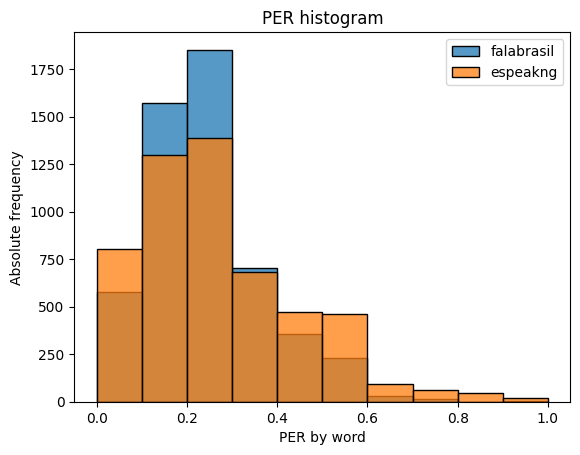

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

bins = np.arange(min(df_cer['falabrasil_pronunciation_clean_cer']), max(df_cer['falabrasil_pronunciation_clean_cer']) + 0.1, 0.1)

top = 2
order = new_cer_s.sort_values(by='New CER').index
for col in order[:top]:
    sns.histplot(df_cer[f'{col}_cer'], label=col.split('_')[0], bins=bins)

plt.title('PER histogram')
plt.xlabel('PER by word')
plt.ylabel('Absolute frequency')
plt.legend()
plt.show()

In [74]:
concat = pd.concat([df, df_cer], axis=1)

In [84]:
print('Analysis of words with highest CER')
for col in order[:top]:
    cols_to_show = ['word_clean','pronunciation_clean',col,f'{col}_cer']
    sort = concat.sort_values(by=f'{col}_cer', ascending=False)[cols_to_show]
    sort.to_csv(f'data/cer_{col.split()[0]}.csv', index=False)
    print()
    print(col.split()[0])
    display(sort.head(50))

Analysis of words with highest CER

falabrasil_pronunciation_clean


,word_clean,pronunciation_clean,falabrasil_pronunciation_clean,falabrasil_pronunciation_clean_cer
3473,ouro,oɾʊ,owru,1.000000
4571,fruir,fɾwi,frujχ,1.000000
4565,sem,seɲ,sẽj̃,1.000000
1498,outrora,otɾɔɾə,owtrora,0.833333
3275,hollywoodesco,ɔliudeskʊ,owwiwoodesku,0.777778
4508,ergo,ɛɾɡʊ,eχɡu,0.750000
2828,glam,ɡlam,ɡlãw̃,0.750000
1556,além,aleɲ,alẽj̃,0.750000
801,ouros,oɾʊs,owrus,0.750000
2274,imbuir,ĩbwi,ĩbujχ,0.750000



espeakng_pronunciation_clean


,word_clean,pronunciation_clean,espeakng_pronunciation_clean,espeakng_pronunciation_clean_cer
3792,hem,ẽj,eɪn,1.500000
2521,honrar,õha,onχar,1.333333
4019,encrencar,ĩkɾẽka,eɪnkreɪnkaɾ,1.333333
5262,enxó,ĩʃɔ,eɪnzɔ,1.333333
495,intensão,ĩtẽsãw,inteɪnsãʊ̃,1.166667
1571,incendiar,ĩsẽdʒja,inseɪndʒiar,1.000000
3453,menção,mẽsãw,meɪnsãʊ̃,1.000000
4691,imprensa,ĩpɾẽjsə,impreɪnsa,1.000000
4728,embrião,ĩbɾiãw,eɪmbriãʊ̃,1.000000
5291,encomendar,ĩkomẽda,eɪnkomeɪndar,1.000000
